In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import re
from tqdm import tqdm,trange
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
os.chdir('C:\\Users\\ASUS\\PycharmProjects\\RahnemaProject')

In [3]:
df = pd.read_csv('Feature_extracted.csv')
#df = df.drop('Unnamed: 0',axis=1)

In [4]:
df = df.sort_values('date_time')

In [5]:
df = df.reset_index()

In [6]:
df = df.drop('index',axis=1)

In [ ]:
with open('anomaly_index.txt','rb') as file:
    indices = pickle.load(file)

In [9]:
anomaly = df.drop(list(indices))
anomaly.tail(20)

In [14]:
df['auth'] =  df['path'].apply(lambda x:x if x.split('/')[-1].endswith('.html') else 0 )
df[df['auth']!=0]['path'].value_counts()

In [17]:
df['login'] = df['path'].apply(lambda x:x if 'login' in x.split('/') else 0 )
df[df['login']!=0]

new features
---



In [7]:
from user_agents import parse
df['is_pc'] = df['user_agent'].apply(lambda x:parse(x).is_pc)

In [8]:
df['is_pc'] = df['is_pc'].apply(lambda x:1 if x==True else 0)

---

In [ ]:
#df.loc[df['response_time'].isnull()==True,'response_time']='NaN'

In [30]:
df.loc[df['response_time'].isnull()==True,'response_time']=\
    df.loc[df['response_time'].isnull()==False,'response_time'].mean()

In [9]:
df['method'] =  df['method'].astype('category')
df['status_code'] =  df['status_code'].astype('category')

---

In [10]:
df.loc[df['geolocation'].isnull()==True,'geolocation'] = 'NaN'

---

In [11]:
df.loc[df['last_refer'].isnull()==True,'last_refer'] = 0
df['date_time'] = pd.to_datetime(df['date_time']).astype(int)/10**6
df.loc[df['last_refer']!=0,'last_refer'] = pd.to_datetime(df.loc[df['last_refer']!=0,'last_refer']).astype(int)/10**6
df['time_interval'] = df.apply(lambda x:x['date_time']-x['last_refer'],axis=1)

In [12]:
df['method'] =  df['method'].astype('category')
df['status_code'] =  df['status_code'].astype('category')


In [13]:
method = pd.get_dummies(df['method'])
stat_code = pd.get_dummies(df['status_code'])

In [14]:
method = method.drop(['Head','Options','Put'],axis=1)
stat_code = stat_code.drop([101,206,301,307,308,500,503,405,408,413,401,403],axis=1)

In [15]:
df.to_csv('feature_extracted_mid')
df = pd.concat([df,method,stat_code],axis=1)
df = df.drop(['status_code','method'],axis=1)

In [17]:
df['depth'] = df['path'].apply(lambda x:len(x.split('/'))-1)

In [18]:
def get_page_type(path):
    path = path.split('/')
    if path[0]=='css'or path[0]=='fonts' or path[0] =='js' :
        return 'css_font_js'
    if path[0]=='images':
        return 'image'
    #if path[0]=='fonts':
     #   return 'fonts'
    #if path[0] =='js':
     #   return 'Js'
    if path[0]=='api':
        return 'api'
    else:
        return 'html'

df['page_type'] = df['path'].apply(lambda x:get_page_type(x))

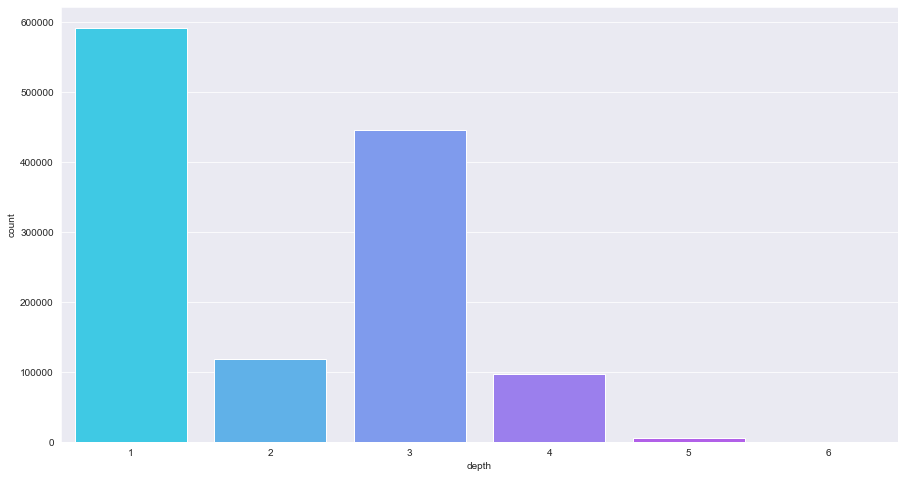

In [32]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.color_palette("Set2")
sns.countplot(df['depth'],palette = 'cool')

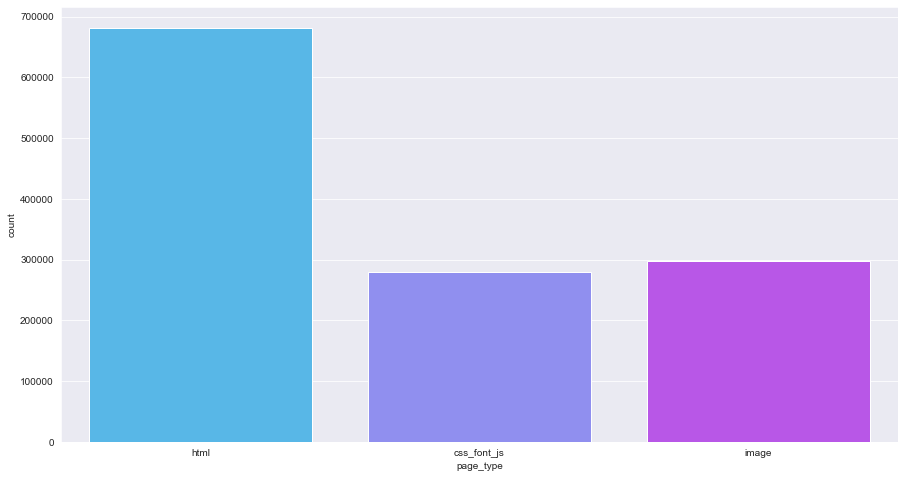

In [33]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.color_palette("Set2")
sns.countplot(df['page_type'],palette = 'cool')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260035 entries, 0 to 1260034
Data columns (total 21 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   client_ip        1260035 non-null  object 
 1   date_time        1260035 non-null  float64
 2   response_length  1260035 non-null  int64  
 3   user_agent       1260035 non-null  object 
 4   response_time    1258317 non-null  float64
 5   path             1260035 non-null  object 
 6   geolocation      1260035 non-null  object 
 7   last_refer       1260035 non-null  object 
 8   coded_path       1260035 non-null  object 
 9   last_page        1208910 non-null  object 
 10  is_pc            1260035 non-null  int64  
 11  time_interval    1260035 non-null  float64
 12  Get              1260035 non-null  uint8  
 13  Post             1260035 non-null  uint8  
 14  200              1260035 non-null  uint8  
 15  304              1260035 non-null  uint8  
 16  400              1

In [112]:
page_type = pd.get_dummies(df['page_type'],drop_first=False)

In [114]:
df = pd.concat([df,page_type],axis=1)
df = df.drop('page_type',axis=1)

In [120]:
df.to_csv('feature_extracted_mid.csv')

In [121]:
df['cycle_count'] = df.apply(lambda x:1  if
                            x['coded_path'].split('-')[-1]==x['last_page'].split('-')[0] else 0 , axis=1)

In [ ]:
df[df['cycle_count']==1]

In [ ]:
df.loc[df['last_page'].isnull()==True,'last_page'] = 'NaN'

In [ ]:
df.info()

In [ ]:
df['coded_path'].value_counts()

In [99]:
df.loc[df['last_page'].isnull()==True,'last_page'] = 'NaN'

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260035 entries, 0 to 1260034
Data columns (total 23 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   client_ip        1260035 non-null  object 
 1   date_time        1260035 non-null  float64
 2   response_length  1260035 non-null  int64  
 3   user_agent       1260035 non-null  object 
 4   response_time    1260035 non-null  float64
 5   path             1260035 non-null  object 
 6   geolocation      1260035 non-null  object 
 7   last_refer       1260035 non-null  object 
 8   coded_path       1260035 non-null  object 
 9   last_page        1260035 non-null  object 
 10  time_interval    1260035 non-null  float64
 11  is_pc            1260035 non-null  int64  
 12  Get              1260035 non-null  uint8  
 13  Post             1260035 non-null  uint8  
 14  200              1260035 non-null  uint8  
 15  304              1260035 non-null  uint8  
 16  400              1

In [35]:
df['coded_path'].value_counts()

4                 225124
6                 125158
1-3               115094
5                  98485
1-2                82802
                   ...  
12-18-22-8867          1
12-18-22-29829         1
12-18-22-16408         1
12-18-22-35631         1
12-18-22-8491          1
Name: coded_path, Length: 62537, dtype: int64

In [101]:
df.isnull().sum()

client_ip          0
date_time          0
response_length    0
user_agent         0
response_time      0
path               0
geolocation        0
last_refer         0
coded_path         0
last_page          0
time_interval      0
is_pc              0
Get                0
Post               0
200                0
304                0
400                0
404                0
499                0
depth              0
page_type          0
dtype: int64

array(['/cdn/profiles/1026106239', 'css/page.2f0fc69390da8cdff683.css',
       'images/badge.png', ..., '/api/v2/connect/568748247',
       '/cdn/pro_photo_gallery/1858858035', '/api/v2/connect/215865643'],
      dtype=object)